In [1]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import rgb2hex
import matplotlib.cm as cm
import plotly.express as px
import plotly.graph_objects as go
import squarify
from plotly.offline import init_notebook_mode,iplot
from wordcloud import WordCloud
import numpy as np 
from scipy import stats
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.colors 
from collections import Counter
cmap2 = cm.get_cmap('twilight',13)
colors1= []
for i in range(cmap2.N):
    rgb= cmap2(i)[:4]
    colors1.append(rgb2hex(rgb))

# Set style
sns.set(style='whitegrid')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/thunderstroke325/60-Days-of-Data-Science-and-ML/main/datasets/marketing_campaign.csv', low_memory = False, sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


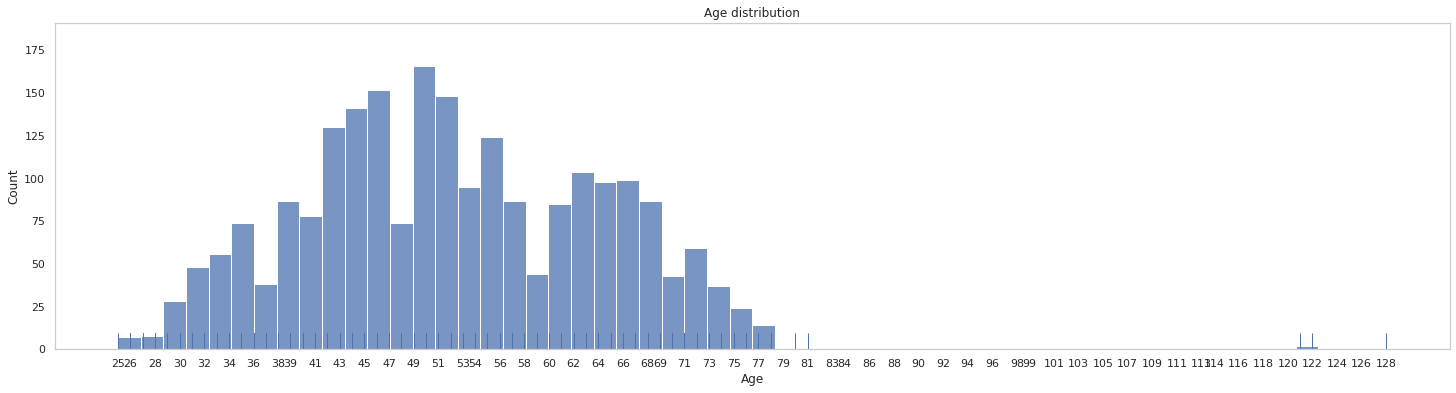

In [4]:
import datetime as dt
df['Age'] = 2021 - df.Year_Birth

# Age Level
plt.figure(figsize=(25, 6))
plt.title('Age distribution')
ax = sns.histplot(df['Age'].sort_values(), bins=56)
sns.rugplot(data=df['Age'], height=.05)
plt.xticks(np.linspace(df['Age'].min(), df['Age'].max(), 56, dtype=int, endpoint = True))
plt.grid(False)
plt.show()

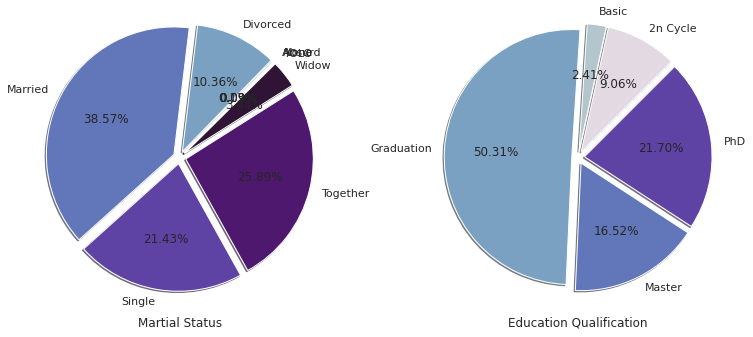

In [5]:
# Education and Marital Status
cc=df.groupby("Marital_Status").count()['Age']
label=df.groupby('Marital_Status').count()['Age'].index
fig, ax = plt.subplots(1, 2, figsize = (10, 12))
ax[0].pie(cc, labels=label, shadow=True, autopct='%1.2f%%',explode=[0.1 for i in cc.index],radius=2,colors=colors1,startangle=45)
ax[0].set_title('Martial Status', y=-0.6)
cc1 = df.groupby("Education").count()['Age']
label = df.groupby('Education').count()['Age'].index
ax[1].pie(cc1, labels=label, shadow=True, autopct='%1.2f%%',explode=[0.1 for i in cc1.index],radius=2,colors=colors1,startangle=45)
ax[1].set_title('Education Qualification', y=-0.6)
plt.subplots_adjust(wspace = 1.5, hspace =0)

plt.show()

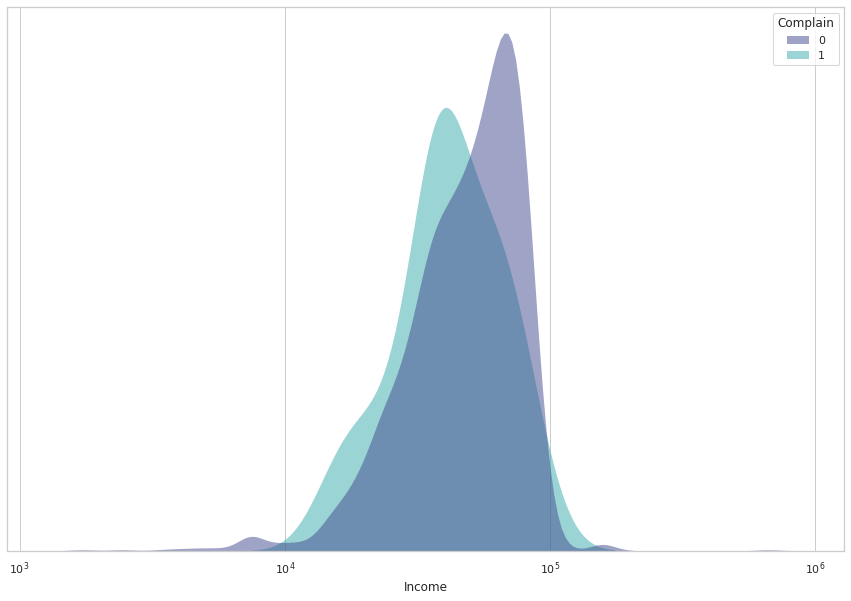

In [8]:
plt.figure(figsize=(15,10))
sns.kdeplot(
   data=df, x="Income", hue="Complain", log_scale= True,
   fill=True, common_norm=False,palette='mako',
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False) # Set y invisible
plt.xlabel('Income')

plt.show()

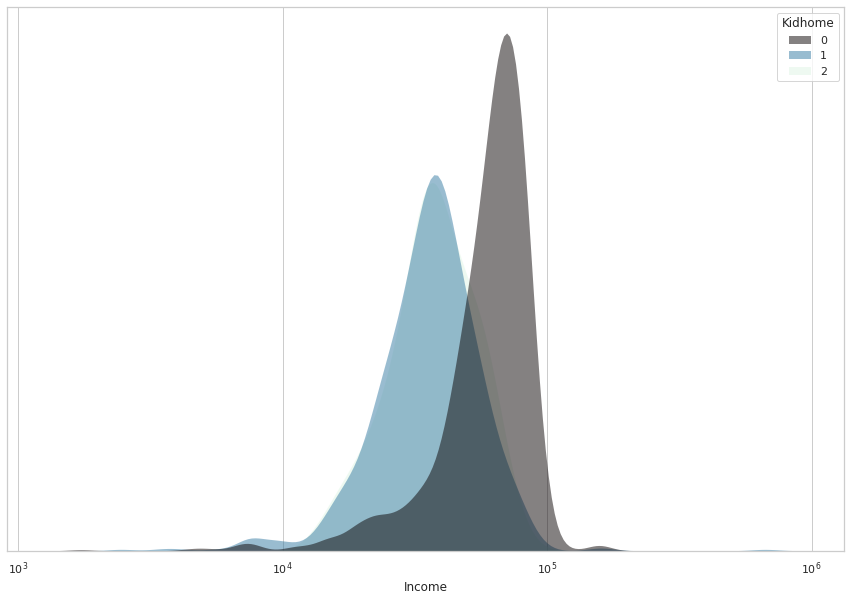

In [7]:
# No of Kids home vs Income
plt.figure(figsize=(15,10))
sns.kdeplot(
   data=df, x="Income", hue="Kidhome", log_scale= True,
   fill=True, common_norm=False,palette='mako',
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False) 
plt.xlabel('Income')

plt.show()

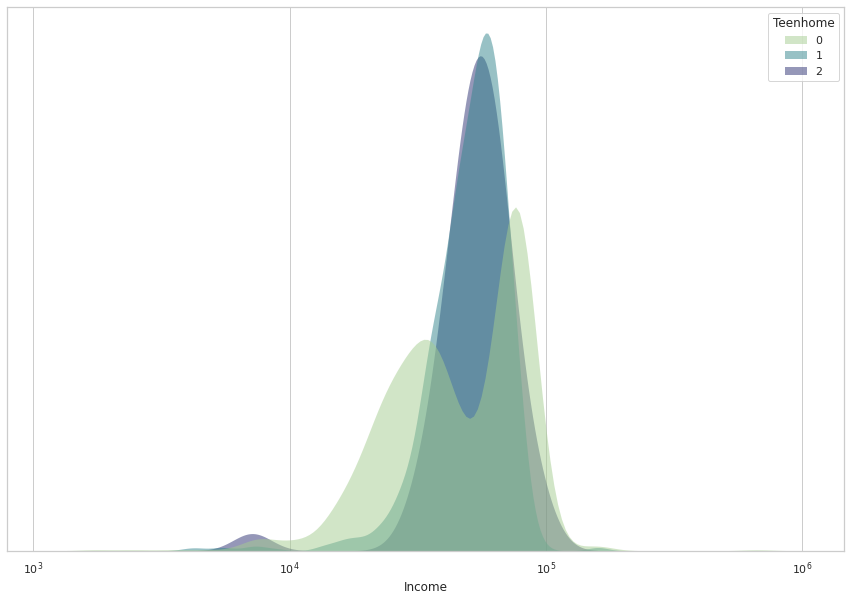

In [9]:
plt.figure(figsize=(15,10))
sns.kdeplot(
   data=df, x="Income", hue="Teenhome", log_scale= True,
   fill=True, common_norm=False,palette='crest',
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False) # Set y invisible
plt.xlabel('Income')

plt.show()

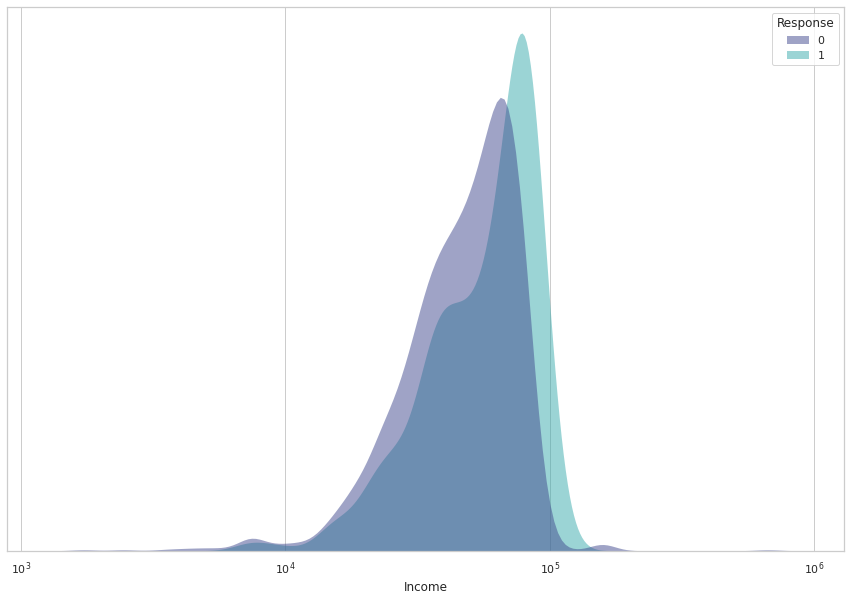

In [11]:
# Income and Response
plt.figure(figsize=(15,10))
sns.kdeplot(
   data=df, x="Income", hue="Response", log_scale= True,
   fill=True, common_norm=False,palette='mako',
   alpha=.5, linewidth=0,
)
plt.gca().axes.get_yaxis().set_visible(False)
plt.xlabel('Income')

plt.show()

In [12]:
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

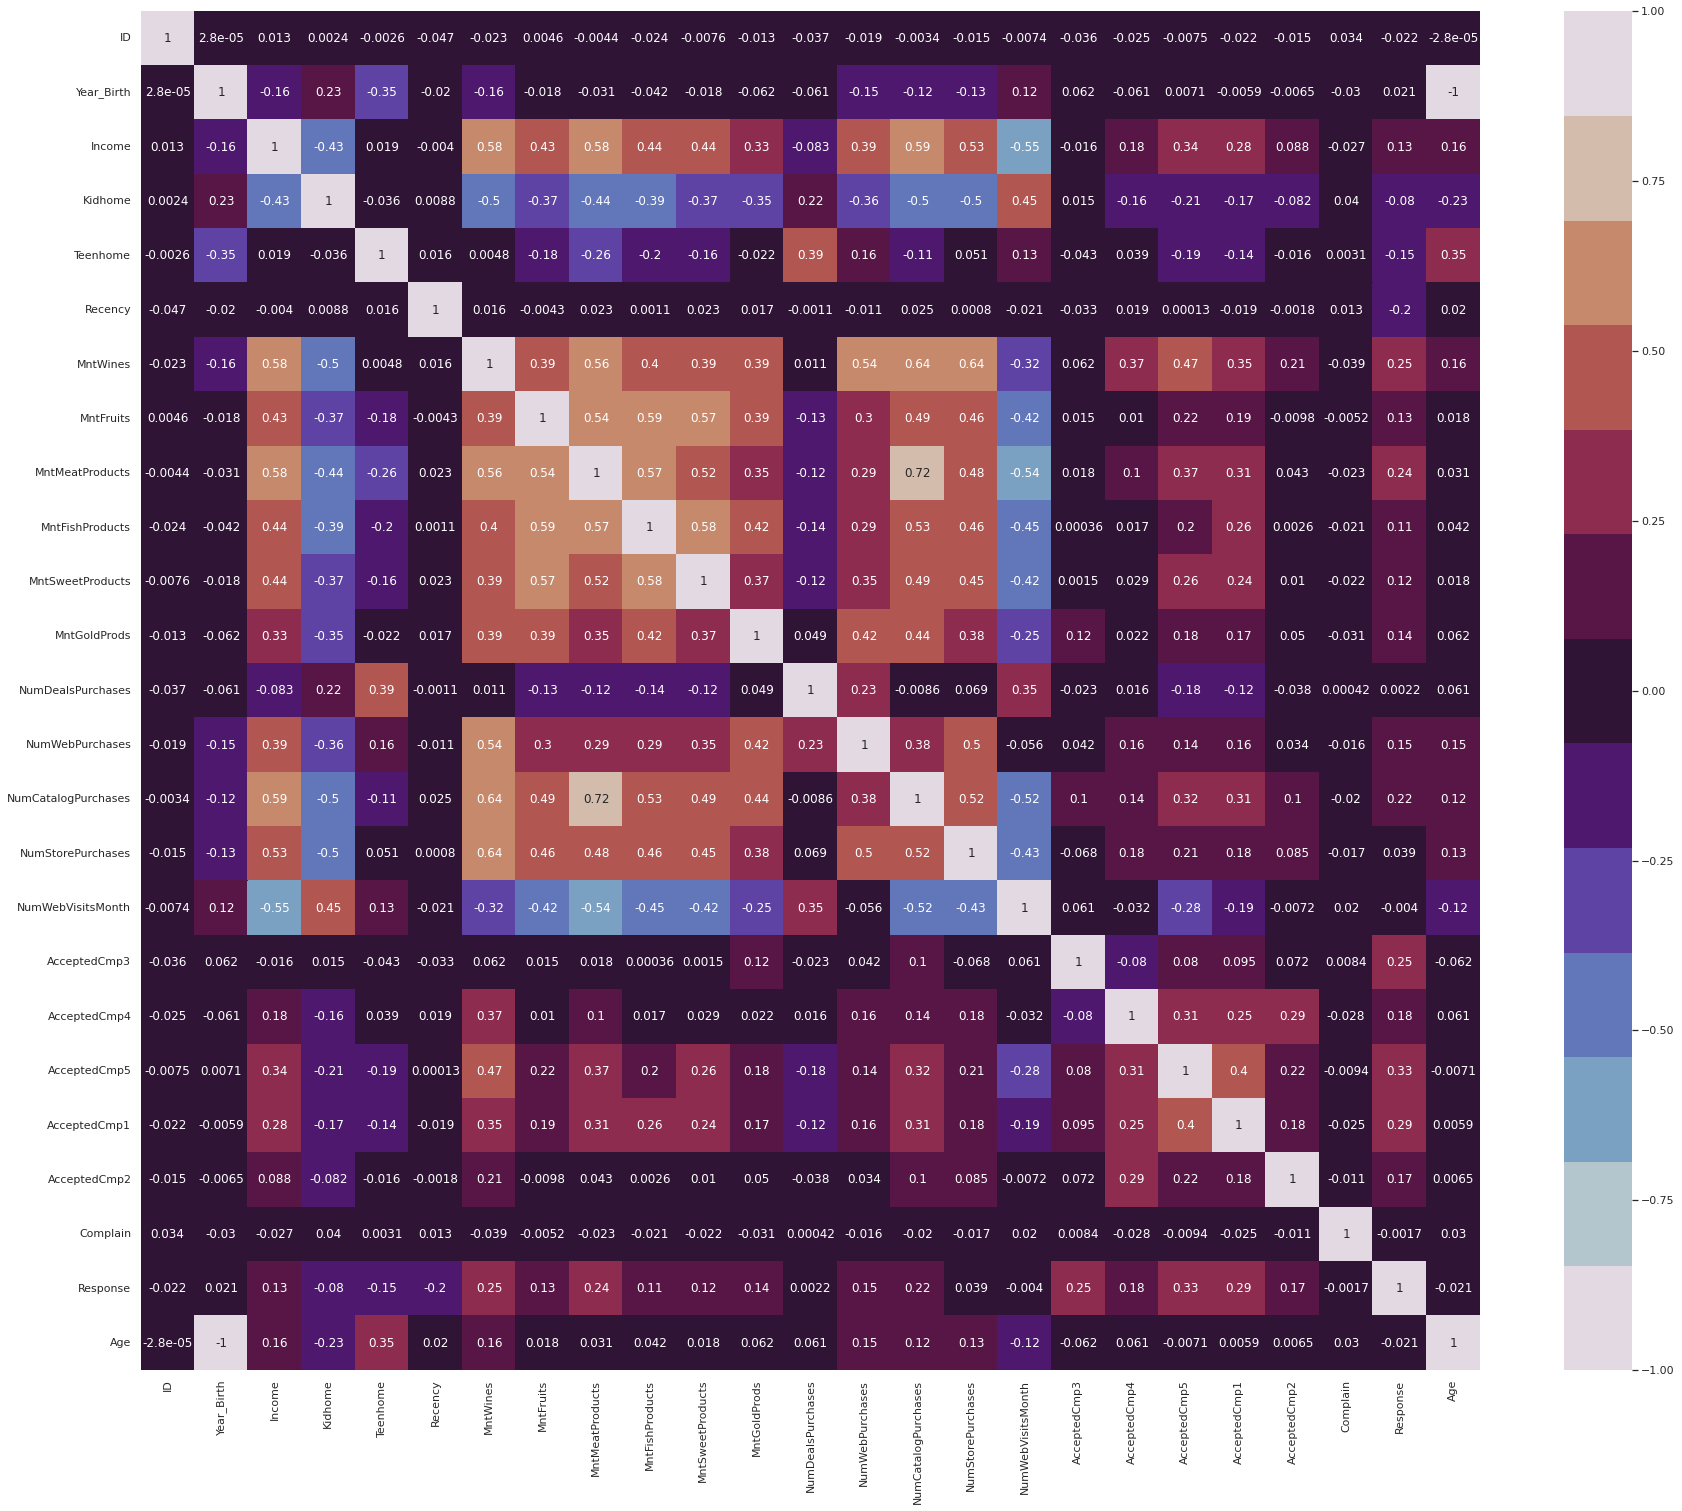

In [13]:
# Heatmap 
plt.figure(figsize = (30,25))
df_cor = df.corr()
sns.heatmap(df_cor, annot = True, cmap = colors1)

plt.show()